In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [2]:
def equation_to_fit(x, basal_expression, maximal_expression, EC50, hill_coeffecient):
    return basal_expression + ((maximal_expression - basal_expression) / (1 + (EC50/x)**hill_coeffecient))
list_of_params_to_fit = ['basal_expression', 'maximal_expression', 'EC50', 'hill_coeffecient']

In [3]:
def report_paramaters(fit_param_names, fit_param_values, fit_param_stdevs):
    for each in range(len(fit_param_names)):
        print(fit_param_names[each], 'is ', fit_param_values[each], 'with a standard deviation of ', fit_param_stdevs[each])

In [4]:
path = "/Users/Weiss Lab/Documents/Jupyter Notebooks/Curve-Fitting/HillTestData.xlsx"
MyData = pd.read_excel(path)
MyData

,lasAHL_nM,MEFL_geomean
0,0.001,39.712346
1,0.010,43.939294
2,0.100,143.155597
3,1.000,1339.986307
4,10.000,3169.570728
5,100.000,2786.902871


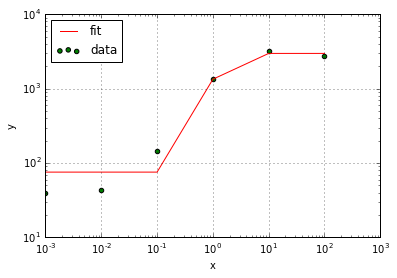

basal_expression is  75.6090217996 with a standard deviation of  141.484475965
maximal_expression is  2978.23679958 with a standard deviation of  141.484475566
EC50 is  1.02511197975 with a standard deviation of  2195881.52446
hill_coeffecient is  10.44474864 with a standard deviation of  902093247.827


In [7]:
'''Return the fitted paramaters and their covariance for the fitted curve'''
init_guess = [10, 10, 10, 10]
low_bounds = [0, 0, 0, 0]
up_bounds = [100000, 100000, 100000, 100000]
fit_params, covar_params = curve_fit(equation_to_fit, MyData.lasAHL_nM, MyData.MEFL_geomean, p0 = init_guess, bounds=(low_bounds, up_bounds)) 
std_dev_error_of_fit_params = np.sqrt(np.diag(covar_params))

plt.scatter(MyData.lasAHL_nM, MyData.MEFL_geomean, c='g', label='data')
plt.plot(MyData.lasAHL_nM, equation_to_fit(MyData.lasAHL_nM, *fit_params), c='r', label='fit')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 'best')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()

report_paramaters(list_of_params_to_fit, fit_params, std_dev_error_of_fit_params)